In [1]:
import pandas as pd
import numpy as np
import math
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
fake_train = train[train["is_fake"] == 1]
true_train = train[train["is_fake"] == 0]

In [5]:
sample = pd.read_csv("sample_submission.csv")

In [6]:
train['date_created'] = pd.to_datetime(train['date_created'])
test['date_created'] = pd.to_datetime(test['date_created'])

In [7]:
train['user_date_created'] = pd.to_datetime(train['user_date_created'])
test['user_date_created'] = pd.to_datetime(test['user_date_created'])

In [8]:
pp.ProfileReport(train)

Number of variables,11
Number of observations,1281499
Total Missing (%),3.2%
Total size in memory,99.0 MiB
Average record size in memory,81.0 B
Numeric,4
Categorical,3
Boolean,1
Date,2
Text (Unique),0
Rejected,1


In [9]:
pp.ProfileReport(test)

Number of variables,11
Number of observations,252099
Total Missing (%),10.0%
Total size in memory,21.2 MiB
Average record size in memory,88.0 B
Numeric,4
Categorical,4
Boolean,0
Date,2
Text (Unique),0
Rejected,1


In [10]:
train.head()

,comment_id,company_id,user_id,product_id,comment,rating,date_created,user_date_created,user_ip,user_agent,is_fake
0,1,2169053,91933,6.0,компания не выполнила заказ без обьяснения пр...,1,2014-10-23 20:26:44,2010-02-03 21:03:22,178.92.70.220,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,False
1,2,709306,91933,2.0,"Впервые встретился такой професиональный, отве...",5,2016-12-10 08:38:27,2010-02-03 21:03:22,94.179.59.162,Mozilla/5.0 (Linux; Android 5.1.1; C6602 Build...,False
2,3,35287,91933,NaN,"Несерйозная, некоректная менеджер інтернет маг...",1,2017-02-11 15:55:14,2010-02-03 21:03:22,37.73.137.188,Mozilla/5.0 (Linux; Android 6.0; ASUS_X008D Bu...,False
3,4,1778322,91933,1.0,"Не рекомендую. Не отвечают, не выполняют заказы.",1,2017-06-26 18:00:45,2010-02-03 21:03:22,37.73.149.180,Mozilla/5.0 (Linux; Android 6.0; ASUS_X008D Bu...,False
4,5,2821533,91933,NaN,"На письма не отвечают, заказы не выполняют. Не...",1,2017-07-06 16:57:40,2010-02-03 21:03:22,37.73.221.126,Mozilla/5.0 (Linux; Android 6.0; ASUS_X008D Bu...,False


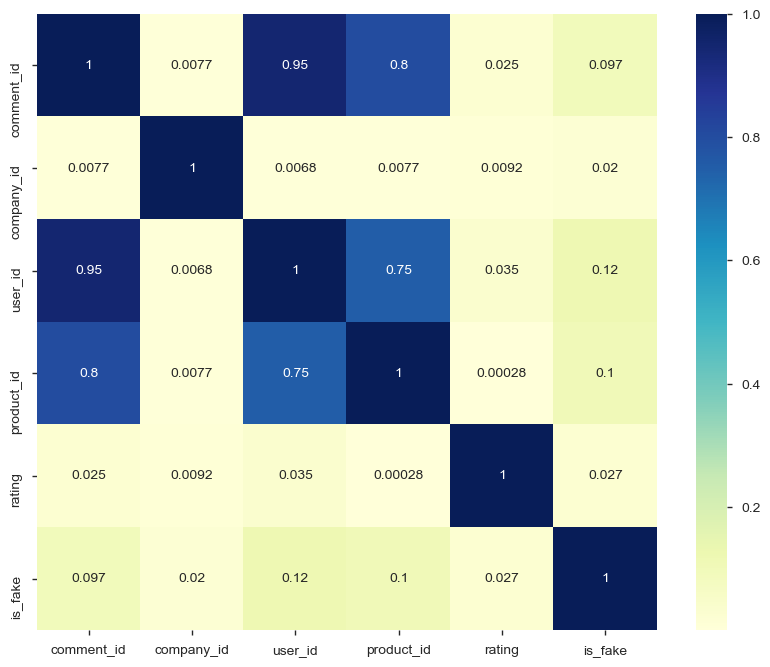

In [11]:
corr=train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="YlGnBu")

In [12]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)

Check for missing values in Train dataset
comment_id                0
company_id                0
user_id                   0
product_id           452022
comment                   0
rating                    0
date_created              0
user_date_created         0
user_ip                 217
user_agent              219
is_fake                   0
dtype: int64


## Short IP

In [ ]:
train["short_id"] = [el.split(".")[0]+"."+ el.split(".")[1] if len(el.split(".")) > 1 else el.split(".")[0] for el in train["user_ip"].astype("str")]

In [ ]:
train["short_id"].head()

In [ ]:
test["short_id"] = [el.split(".")[0]+"."+ el.split(".")[1] if len(el.split(".")) > 1 else el.split(".")[0] for el in test["user_ip"].astype("str")]

In [ ]:
id_df = pd.DataFrame(index=train["short_id"].unique())
id_df["False"]=[train[(train["short_id"] == cur_id) & train["is_fake"]].shape[0] for cur_id in train["short_id"].unique()]

In [ ]:
id_df.columns = ["False"]
id_df["True"]=[train[(train["short_id"] == cur_id) & (train["is_fake"] == 0)].shape[0] for cur_id in train["short_id"].unique()]

In [ ]:
id_df["f_norm"] = [el["False"] / (el["True"] + el["False"]) for ind, el in id_df.iterrows()]

In [ ]:
train["ip_false"] = [id_df.loc[el]["f_norm"] for el in train["short_id"]]

In [ ]:
test["ip_false"] = [id_df.loc[el]["f_norm"] if el in id_df.index else -1 for el in test["short_id"]]

In [ ]:
id_df.shape

In [ ]:
id_df[id_df["f_norm"] >= 0.5].shape

In [ ]:
badcount = sum(id_df[id_df["f_norm"] >= 0.5]["False"])
display(badcount)
badcount_all = sum(id_df[id_df["f_norm"] >= 0.5]["False"]) + sum(id_df[id_df["f_norm"] >= 0.5]["True"])
display(badcount_all)

display(train[train["is_fake"] == 1].shape[0])
display(train.shape[0])

In [ ]:
corr=train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="YlGnBu")

In [ ]:
train["ip_false"].to_csv(path = "train_ip.csv",header = True, index_label = True)

In [ ]:
test["ip_false"].to_csv(path = "test_ip.csv",header = True, index_label = True)

## ID Advanced

In [13]:
fake_ips = fake_train["user_ip"].sort_values().unique()

In [14]:
fake_ips

array(['104.200.24.17', '109.104.168.220', '109.163.234.8',
       '109.254.49.24', '119.81.109.51', '119.81.109.59', '119.81.109.62',
       '121.100.143.159', '121.100.143.169', '122.152.167.12',
       '122.152.167.190', '124.109.1.207', '128.52.128.105',
       '130.180.208.8', '130.180.209.195', '130.180.211.57',
       '130.180.212.133', '130.180.212.175', '130.180.212.32',
       '130.180.212.74', '134.249.177.32', '136.0.98.173', '136.0.98.177',
       '136.0.98.18', '136.0.98.52', '139.162.250.124', '139.59.121.220',
       '141.101.8.14', '141.255.189.161', '142.44.166.241',
       '142.91.189.91', '142.91.189.93', '146.185.27.139',
       '149.154.152.177', '151.1.216.179', '151.80.254.227',
       '159.122.105.116', '159.122.105.124', '159.122.86.186',
       '159.203.47.229', '161.202.89.230', '162.220.246.230',
       '163.172.170.161', '163.172.191.54', '163.172.217.50',
       '166.88.123.67', '167.114.77.220', '171.25.193.132',
       '173.208.213.114', '173.239.230.3'

In [15]:
def ip_to_bool (str_ip):
    aim = ''
    for part in str_ip.split("."):
        aim = aim + '{0:08b}'.format(int(part))
    return aim

In [16]:
fake_bin_id = ["" for el in range(len(fake_ips))]

for el, ind in zip(fake_ips, np.arange(len(fake_ips))):
    aim = ''
    for part in el.split("."):
        #print(part)
        aim = aim + '{0:08b}'.format(int(part))
        fake_bin_id[ind] = aim
fake_bin_id

['01101000110010000001100000010001',
 '01101101011010001010100011011100',
 '01101101101000111110101000001000',
 '01101101111111100011000100011000',
 '01110111010100010110110100110011',
 '01110111010100010110110100111011',
 '01110111010100010110110100111110',
 '01111001011001001000111110011111',
 '01111001011001001000111110101001',
 '01111010100110001010011100001100',
 '01111010100110001010011110111110',
 '01111100011011010000000111001111',
 '10000000001101001000000001101001',
 '10000010101101001101000000001000',
 '10000010101101001101000111000011',
 '10000010101101001101001100111001',
 '10000010101101001101010010000101',
 '10000010101101001101010010101111',
 '10000010101101001101010000100000',
 '10000010101101001101010001001010',
 '10000110111110011011000100100000',
 '10001000000000000110001010101101',
 '10001000000000000110001010110001',
 '10001000000000000110001000010010',
 '10001000000000000110001000110100',
 '10001011101000101111101001111100',
 '10001011001110110111100111011100',
 

In [17]:
fake_bin_id[0]

'01101000110010000001100000010001'

In [18]:
fake_id_values = []
first_r = True
last_comp = fake_bin_id[0]

for elem in fake_bin_id:
    
    if first_r:
        first_r = False
        last_comp = elem
        continue
        
    same = 0
    
    for i in range(min([len(elem), len(last_comp)])):
        if elem[i] != last_comp[i]: break
        same = same + 1
        
    if same < 6:
        fake_id_values.append(last_comp)
        last_comp = elem
        continue
    
    last_comp = last_comp[:same]
        
        
fake_id_values

['01101000110010000001100000010001',
 '01101101',
 '0111011101010001011011010011',
 '011110',
 '01111100011011010000000111001111',
 '100000',
 '10000110111110011011000100100000',
 '100010',
 '100011',
 '10010010101110010001101110001011',
 '100101',
 '10011111',
 '101000',
 '1010011',
 '10101011000110011100000110000100',
 '1010110111',
 '101100',
 '10111001',
 '1011110',
 '110000',
 '110001',
 '00000010001111001010010100101110',
 '1101000',
 '1101010',
 '1101100',
 '00010111',
 '00011111',
 '00100101',
 '00101011111111110101001101000',
 '00101110',
 '00000101',
 '0011001',
 '00111110',
 '01000000011111000010000001010100',
 '01000101101000101000101100001001',
 '010011',
 '0101000100000111000011101',
 '010101',
 '010110']

In [19]:
fake_id_values = [el if (len(el) != 32) else el[:28] for el in fake_id_values]
fake_id_values

['0110100011001000000110000001',
 '01101101',
 '0111011101010001011011010011',
 '011110',
 '0111110001101101000000011100',
 '100000',
 '1000011011111001101100010010',
 '100010',
 '100011',
 '1001001010111001000110111000',
 '100101',
 '10011111',
 '101000',
 '1010011',
 '1010101100011001110000011000',
 '1010110111',
 '101100',
 '10111001',
 '1011110',
 '110000',
 '110001',
 '0000001000111100101001010010',
 '1101000',
 '1101010',
 '1101100',
 '00010111',
 '00011111',
 '00100101',
 '00101011111111110101001101000',
 '00101110',
 '00000101',
 '0011001',
 '00111110',
 '0100000001111100001000000101',
 '0100010110100010100010110000',
 '010011',
 '0101000100000111000011101',
 '010101',
 '010110']

In [20]:
train["boolean_ip"] = [ip_to_bool(el) if not isinstance(el,float) else "n" for el in train["user_ip"]] 

In [21]:
test["boolean_ip"] = [ip_to_bool(el) if not isinstance(el,float) else "n" for el in test["user_ip"]] 

In [22]:
true_train["boolean_ip"] = [ip_to_bool(el) if not isinstance(el,float) else "n" for el in true_train["user_ip"]] 
fake_train["boolean_ip"] = [ip_to_bool(el) if not isinstance(el,float) else "n" for el in fake_train["user_ip"]] 

In [23]:
#train["boolean_ip"]

In [24]:
fake_df = pd.DataFrame(index = fake_id_values)

In [25]:
fake_df['true'] = [true_train[ [el.startswith(cur_ip) if not isinstance(el,float) else 0 for el in true_train["boolean_ip"]] ].shape[0] for cur_ip in fake_df.index]
fake_df['false'] = [fake_train[ [el.startswith(cur_ip) if not isinstance(el,float) else 0 for el in fake_train["boolean_ip"]] ].shape[0] for cur_ip in fake_df.index]

In [26]:
fake_df['total'] = fake_df['true'] + fake_df['false']

In [27]:
fake_df['f_norm'] = fake_df['false'] / fake_df['total']

In [28]:
#fake_df

In [29]:
ip_true = []
ip_false = []
ip_norm = []
ip_total = []

for ind, row in train.iterrows():
    for fake in fake_id_values:
        if row["boolean_ip"].startswith(fake):
            nerow = fake_df.loc[fake]
            display (nerow)
            ip_true.append(nerow["true"])
            ip_false.append(nerow["false"])
            ip_norm.append(nerow["f_norm"])
            ip_total.append(nerow["total"])
            print(ind)
            break
        ip_true.append(1)
        ip_false.append(0)
        ip_norm.append(0)
        ip_total.append(1)
        break

true      3.00
false     1.00
total     4.00
f_norm    0.25
Name: 0110100011001000000110000001, dtype: float64

1011008


true      3.00
false     1.00
total     4.00
f_norm    0.25
Name: 0110100011001000000110000001, dtype: float64

1011011


true      3.00
false     1.00
total     4.00
f_norm    0.25
Name: 0110100011001000000110000001, dtype: float64

1011012


true      3.00
false     1.00
total     4.00
f_norm    0.25
Name: 0110100011001000000110000001, dtype: float64

1256902


In [31]:
ip_true

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
ip_false

In [30]:
display(len(ip_true))
train.shape[0]

1281499

1281499

In [33]:
train["ip_true_values"] = ip_true
train["ip_false_values"] = ip_false
train["ip_false_norm"] = ip_norm
train["ip_total_values"] = ip_total

In [37]:
ip_true = []
ip_false = []
ip_norm = []
ip_total = []

for ind, row in test.iterrows():
    for fake in fake_id_values:
        if row["boolean_ip"].startswith(fake):
            nerow = fake_df.loc[fake]
            display (nerow)
            ip_true.append(nerow["true"])
            ip_false.append(nerow["false"])
            ip_norm.append(nerow["f_norm"])
            ip_total.append(nerow["total"])
            print(ind)
            break
        ip_true.append(1)
        ip_false.append(0)
        ip_norm.append(0)
        ip_total.append(1)
        break

In [38]:
len(ip_true)

252099

In [40]:
test["ip_true_values"] = ip_true
test["ip_false_values"] = ip_false
test["ip_false_norm"] = ip_norm
test["ip_total_values"] = ip_total

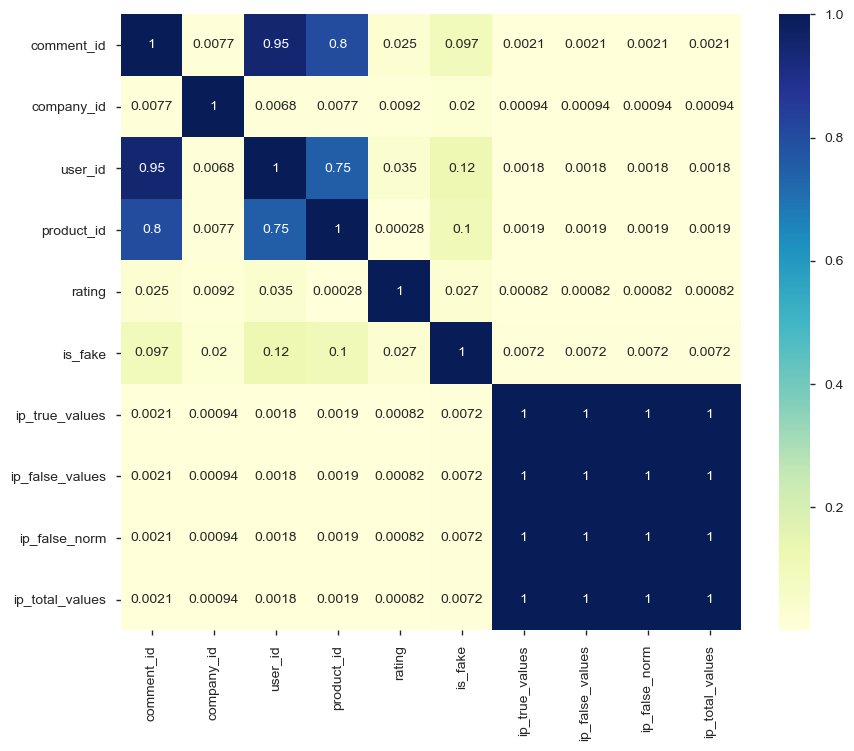

In [41]:
corr=train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="YlGnBu")

In [46]:
output_train = pd.DataFrame(index = train.index)
output_test = pd.DataFrame(index = test.index)

In [47]:
output_train["ip_true_values"] = train["ip_true_values"]
output_train["ip_false_values"] = train["ip_false_values"]
output_train["ip_false_norm"] = train["ip_false_norm"]
output_train["ip_total_values"] = train["ip_total_values"]

In [48]:
output_test["ip_true_values"] = test["ip_true_values"]
output_test["ip_false_values"] = test["ip_false_values"]
output_test["ip_false_norm"] = test["ip_false_norm"]
output_test["ip_total_values"] = test["ip_total_values"]

In [50]:
output_train.to_csv(path_or_buf="over_ip_train.csv",header = True)

In [ ]:
output_test.to_csv(path = "over_ip_test.csv",header = True)

## Company

In [ ]:
vval = [el for el in fake_train["company_id"].value_counts().iteritems() if not (el in true_train["user_id"].value_counts().iteritems())]

#sum(vval[vval.values > 10].values
#display(vval.index[0])

In [ ]:
vval
vval[-1][0]

company_id -> amount, good, bad, sootn, av_rate, product_amount
product_id -> ...
ip

In [ ]:
un = train["company_id"].value_counts()
ui_df = pd.DataFrame(index=[el for el in un.index if (un[el] > 0)])

In [ ]:
len([el for el in un.index if (un[el] > 0)])

In [ ]:
ui_df["False"]=[fake_train[(fake_train["company_id"] == cur_id)].shape[0] for cur_id in ui_df.index]

In [ ]:
ui_df["True"]=[true_train[(true_train["company_id"] == cur_id)].shape[0] for cur_id in ui_df.index]

In [ ]:
ui_df["overall"]=ui_df["True"]+ui_df["False"]

In [ ]:
ui_df["f_norm"] = [el["False"] / (el["True"] + el["False"]) for ind, el in ui_df.iterrows()]

In [ ]:
ui_df["rate_total"]=[sum(true_train[(true_train["company_id"] == cur_id)]["rating"]) for cur_id in ui_df.index]

In [ ]:
ui_df["average_rate"]=ui_df["rate_total"] / ui_df["overall"]

In [ ]:
train["ui_false"] = [ui_df.loc[el]["f_norm"] for el in train["company_id"]]

In [ ]:
test["ui_false"] = [ui_df.loc[el]["f_norm"] if el in ui_df.index else -1 for el in test["company_id"]]

In [ ]:
train['comp_true'] = [ui_df.loc[el]["True"] for el in train["company_id"]]
train['comp_false'] = [ui_df.loc[el]["False"] for el in train["company_id"]]

In [ ]:
test['comp_true'] = [ui_df.loc[el]["True"] if el in ui_df.index else -1 for el in test["company_id"]]
test['comp_false'] = [ui_df.loc[el]["False"] if el in ui_df.index else -1 for el in test["company_id"]]

In [ ]:
train['comp_all'] = [ui_df.loc[el]["overall"] for el in train["company_id"]]
test['comp_all'] = [ui_df.loc[el]["overall"] if el in ui_df.index else -1 for el in test["company_id"]]

In [ ]:
train['summary_rate'] = [ui_df.loc[el]["rate_total"] for el in train["company_id"]]
test['summary_rate'] = [ui_df.loc[el]["rate_total"] if el in ui_df.index else -1 for el in test["company_id"]]

In [ ]:
train['average_rate'] = [ui_df.loc[el]["average_rate"] for el in train["company_id"]]
test['average_rate'] = [ui_df.loc[el]["average_rate"] if el in ui_df.index else -1 for el in test["company_id"]]

In [ ]:
train['company_rating_difference'] = train["rating"]-train["average_rate"]
test['company_rating_difference'] = test["rating"]-test["average_rate"]

In [ ]:
train.corr()

In [ ]:
company_output_train = pd.DataFrame(index=train.index)
company_output_train["company_true"] = train['comp_true']
company_output_train["company_false"] = train['comp_false']
company_output_train["company_overall"] = train['comp_all']
company_output_train["company_false_normalized"] = train['ui_false']
company_output_train["company_rate_total"] = train['summary_rate']
company_output_train["company_average_rate"] = train['average_rate']
company_output_train['company_rating_difference']=train['company_rating_difference']

In [ ]:
company_output_test = pd.DataFrame(index=test.index)
company_output_test["company_true"] = test['comp_true']
company_output_test["company_false"] = test['comp_false']
company_output_test["company_overall"] = test['comp_all']
company_output_test["company_overall"] = company_output_test["company_overall"].replace(to_replace=-2, value=-1)
company_output_test["company_false_normalized"] = test['ui_false']
company_output_test["company_rate_total"] = test['summary_rate']
company_output_test["company_average_rate"] = test['average_rate']
company_output_test['company_rating_difference'] = test['company_rating_difference']

In [ ]:
company_output_test[company_output_test['company_overall'] == -1].shape[0]

In [ ]:
company_output_train.to_csv(path_or_buf= "company_train.csv",header = True)
company_output_test.to_csv(path_or_buf= "company_test.csv",header = True)

In [ ]:
corr=train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="YlGnBu")

## Company?

In [ ]:
list_ = train["company_id"].value_counts()
len(list_[list_.values > 60])

In [ ]:
sum(list_[list_.values>60].values)

In [ ]:
train.shape[0]

## Other

In [ ]:
feat = train["short_id"]
x = feat.value_counts()

In [ ]:
display(x.shape)
x.head()

In [ ]:
#for cur_id in train["short_id"].unique():
   # cur_train = train[(train["short_id"] == cur_id)]["is_fake"]
    #id_df.iloc[cur_id] = cur_train.value_counts()

In [ ]:
chosen = x[x.values > 1]
chosen.head()

In [ ]:
#train[feat == x.index[0]]['is_fake'].value_counts()
#res = np.array([])
#for el in chosen.index:
    #display(train[feat == el]['is_fake'].value_counts())

In [ ]:
plt.figure(figsize=(10,5))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [ ]:
test["ip_false"].tail()